# Analyze the dataset

This notebook is used to analyze the dataset and to get some insights about it.

In [7]:
# dataset = "Sketches-Dataset-main/data"
dataset = "datasets/hdBPMN-icdar2021"

In [8]:
from src.utils.utils_json import read_json, print_json

meta = read_json(dataset + "/train.json")

In [9]:
# Count images in the meta
print(f'Image count: {len(meta["images"])}')
print(f'Annotation count: {len(meta["annotations"])}')

Image count: 308
Annotation count: 10366


In [10]:
categories = {}

for anno in meta["annotations"]:
    category = anno["category"]
    if category not in categories:
        categories[category] = 0

    categories[category] += 1

print_json(categories)

{
  "dataAssociation": 830,
  "dataObject": 419,
  "dataStore": 92,
  "event": 598,
  "eventBasedGateway": 41,
  "exclusiveGateway": 490,
  "lane": 320,
  "messageEvent": 409,
  "messageFlow": 533,
  "parallelGateway": 393,
  "pool": 407,
  "sequenceFlow": 3924,
  "subProcess": 60,
  "task": 1759,
  "timerEvent": 91
}


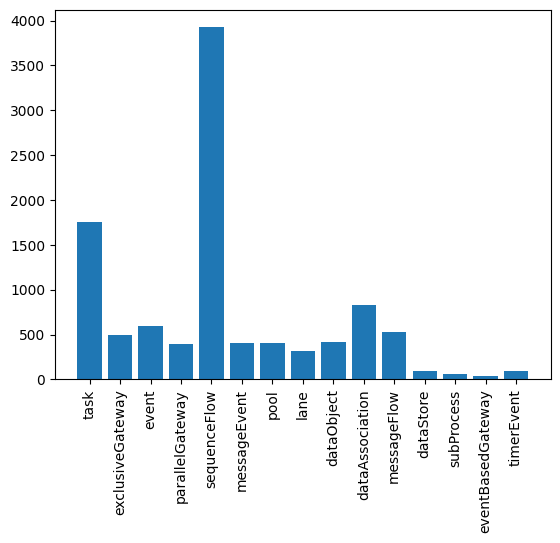

In [11]:
# Plot the distribution of the categories
import matplotlib.pyplot as plt

plt.bar(categories.keys(), categories.values())
plt.xticks(rotation=90)
plt.show()

In [19]:
from src.utils.utils_bbox import bbox_iou

count = 0

for anno1 in meta["annotations"]:
    for anno2 in meta["annotations"]:
        if anno1["image_id"] != anno2["image_id"]:
            continue

        if anno1["id"] == anno2["id"]:
            continue

        iou = bbox_iou(anno1["bbox"], anno2["bbox"])
        if iou >= 0.8:
            print("Image ID:  ", anno1["image_id"])
            print("Category-1:", anno1["category"])
            print("Category-2:", anno2["category"])
            print("IOU:       ", iou)
            print()
            count += 1

print(f"Found {count} overlapping bounding boxes")

Image ID:   144
Category-1: pool
Category-2: lane
IOU:        0.947043253455366

Image ID:   144
Category-1: lane
Category-2: pool
IOU:        0.947043253455366
Image ID:   233
Category-1: lane
Category-2: lane
IOU:        0.9562336613089997

Image ID:   233
Category-1: lane
Category-2: lane
IOU:        0.9562336613089997
Image ID:   253
Category-1: lane
Category-2: lane
IOU:        0.9484101163308568

Image ID:   253
Category-1: lane
Category-2: lane
IOU:        0.9484101163308568
Image ID:   262
Category-1: lane
Category-2: lane
IOU:        0.9062435546763221

Image ID:   262
Category-1: lane
Category-2: lane
IOU:        0.9062435546763221
Image ID:   300
Category-1: pool
Category-2: lane
IOU:        0.9364406857769814

Image ID:   300
Category-1: lane
Category-2: pool
IOU:        0.9364406857769814
Found 10 overlapping bounding boxes
